In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import arviz as az
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.stats as st
from tqdm import trange

from functions.load_data import load_data
from functions.gibbs_reg import gibbs_regression
from functions.mcmc_stats import mcmc_stats
from functions.mcmc_plots import mcmc_plots
from functions.plot_posterior_vs_prior import prior_vs_posterior_plot
from functions.sddr_beta import sddr_beta

data = load_data()

/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/numpyro-env/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


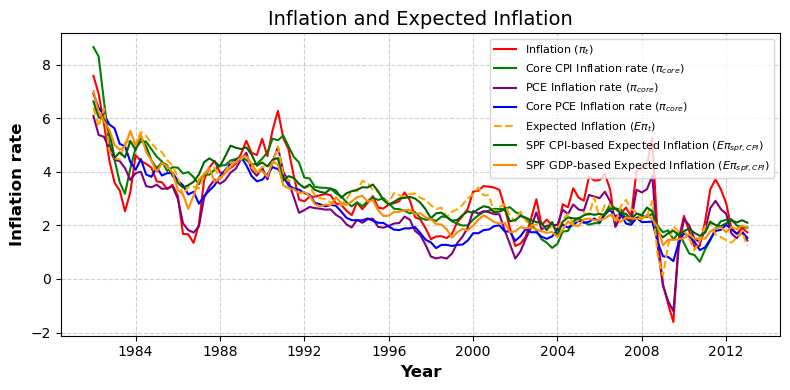

In [3]:
# --- 2×2 graph ---
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

# --- 1. Inflation and Expected Inflation ---
ax1 = axs
ax1.plot(data["DATE"], data["pi_cpi"], label=r'Inflation $(\pi_{t})$', color='red')
ax1.plot(data["DATE"], data["pi_cpi_core"], label=r'Core CPI Inflation rate $(\pi_{core})$', color='green')
ax1.plot(data["DATE"], data["pi_pce"], label=r'PCE Inflation rate $(\pi_{core})$', color='purple')
ax1.plot(data["DATE"], data["pi_pce_core"], label=r'Core PCE Inflation rate $(\pi_{core})$', color='blue')
ax1.plot(data["DATE"], data["Epi"], label=r'Expected Inflation $(E\pi_{t})$', linestyle='--', color='orange')
ax1.plot(data["DATE"], data["Epi_spf_cpi"], label=r'SPF CPI-based Expected Inflation $(E\pi_{spf,CPI})$', color='darkgreen')
ax1.plot(data["DATE"], data["Epi_spf_gdp"], label=r'SPF GDP-based Expected Inflation $(E\pi_{spf,CPI})$', color='darkorange')
ax1.set_xlabel('Year', fontsize=12, weight='bold')
ax1.set_ylabel('Inflation rate', fontsize=12, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_title('Inflation and Expected Inflation', fontsize=14)
ax1.legend(fontsize=8)

# --- Layout ---
plt.tight_layout()
plt.show()

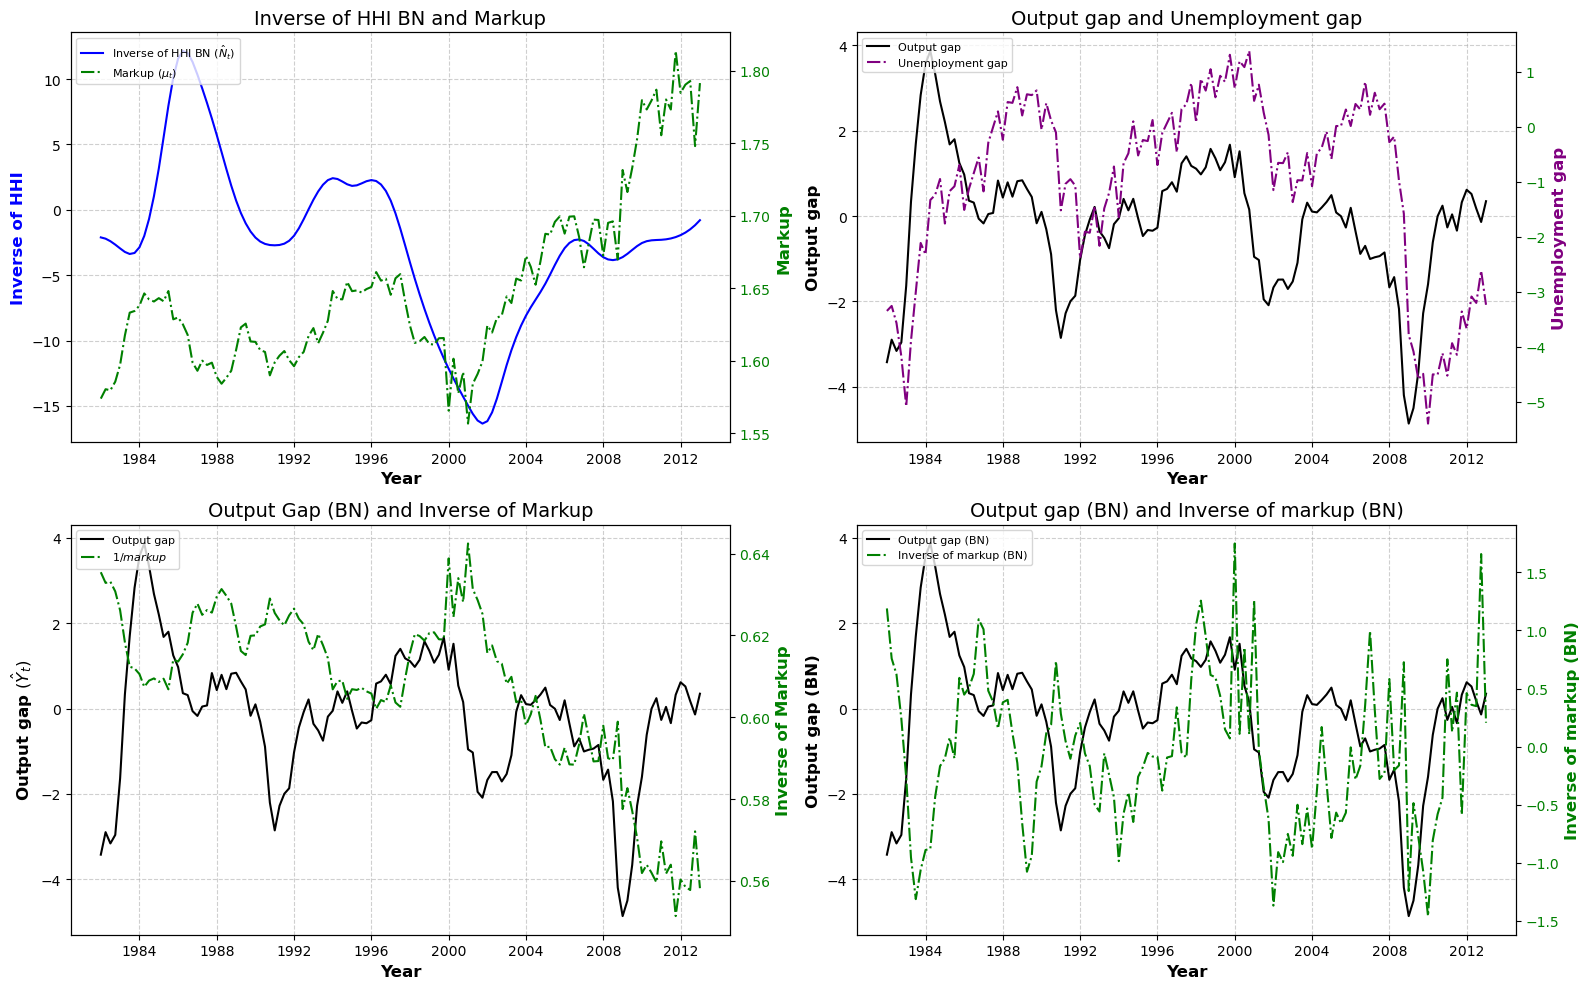

In [9]:
# --- 2×2 graph ---
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# --- 2. Number of Firms and Markup ---
ax1 = axs[0, 0]
ax1_left = ax1
ax1_right = ax1_left.twinx()
ax1_left.plot(data["DATE"], data["N_BN"], label=r'Inverse of HHI BN $(\hat{N}_{t})$', color='blue')
ax1_right.plot(data["DATE"], data["markup"], label=r'Markup $(\mu_{t})$', linestyle='-.', color='green')
ax1_left.set_xlabel('Year', fontsize=12, weight='bold')
ax1_left.set_ylabel('Inverse of HHI', fontsize=12, weight='bold', color = 'blue')
ax1_right.set_ylabel('Markup', fontsize=12, weight='bold', color='green')
ax1_right.tick_params(axis='y', labelcolor='green')
ax1_left.grid(True, linestyle='--', alpha=0.6)
ax1_left.set_title('Inverse of HHI BN and Markup', fontsize=14)
lines = ax1_left.get_lines() + ax1_right.get_lines()
labels = [line.get_label() for line in lines]
ax1_left.legend(lines, labels, loc='upper left', fontsize=8)

ax2 = axs[0, 1]
ax2_left = ax2
ax2_right = ax2_left.twinx()
ax2_left.plot(data["DATE"], data["output_gap_BN"], label='Output gap', color='black')
ax2_right.plot(data["DATE"], data["unemp_gap"], label='Unemployment gap', linestyle='-.', color='purple')
ax2_left.set_xlabel('Year', fontsize=12, weight='bold')
ax2_left.set_ylabel('Output gap', fontsize=12, weight='bold', color = 'black')
ax2_right.set_ylabel('Unemployment gap', fontsize=12, weight='bold', color='purple')
ax2_right.tick_params(axis='y', labelcolor='green')
ax2_left.grid(True, linestyle='--', alpha=0.6)
ax2_left.set_title('Output gap and Unemployment gap', fontsize=14)
lines = ax2_left.get_lines() + ax2_right.get_lines()
labels = [line.get_label() for line in lines]
ax2_left.legend(lines, labels, loc='upper left', fontsize=8)


# --- 3. Output Gap and Inverse Markup ---
ax3 = axs[1, 0]
ax3_left = ax3
ax3_right = ax3_left.twinx()
ax3_left.plot(data["DATE"], data["output_gap_BN"], label='Output gap', color='black')
ax3_right.plot(data["DATE"], 1/data["markup"], label=r'$1/markup$', linestyle='-.', color='green')
ax3_left.set_xlabel('Year', fontsize=12, weight='bold')
ax3_left.set_ylabel(r'Output gap $(\hat{Y}_t)$', fontsize=12, weight='bold')
ax3_right.set_ylabel('Inverse of Markup', fontsize=12, weight='bold', color='green')
ax3_right.tick_params(axis='y', labelcolor='green')
ax3_left.grid(True, linestyle='--', alpha=0.6)
ax3_left.set_title('Output Gap (BN) and Inverse of Markup', fontsize=14)
lines = ax3_left.get_lines() + ax3_right.get_lines()
labels = [line.get_label() for line in lines]
ax3_left.legend(lines, labels, loc='upper left', fontsize=8)

ax4 = axs[1, 1]
ax4_left = ax4
ax4_right = ax4_left.twinx()
ax4_left.plot(data["DATE"], data["output_gap_BN"], label=r'Output gap (BN)', color='black')
ax4_right.plot(data["DATE"], data["markup_BN_inv"], label=r'Inverse of markup (BN)', linestyle='-.', color='green')
ax4_left.set_xlabel('Year', fontsize=12, weight='bold')
ax4_left.set_ylabel('Output gap (BN)', fontsize=12, weight='bold', color='black')
ax4_right.set_ylabel('Inverse of markup (BN)', fontsize=12, weight='bold', color='green')
ax4_right.tick_params(axis='y', labelcolor='green')
ax4_left.grid(True, linestyle='--', alpha=0.6)
ax4_left.set_title('Output gap (BN) and Inverse of markup (BN)', fontsize=14)
lines = ax4_left.get_lines() + ax4_right.get_lines()
labels = [line.get_label() for line in lines]
ax4_left.legend(lines, labels, loc='upper left', fontsize=8)

# --- Layout ---
plt.tight_layout()
plt.show()